# UTSA CS 3793/5233: Assignment-3

Summer 2021


**Last Name - First Name - (abc123)**






## Learning Objectives

Implement 2 different machine learning algorithms
*   Stochastic Gradient Descent
*   ID3 Decision Tree



## Description

This assignment is focused on **machine learning**, mainly on the implementation of 2 different algorithms - Stochastic Gradient Descent & ID3 decision tree. 
The assignment is divided into two sections, each for one unique ML algorithm. 

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library that contains the implementation of ML algorithms. You can get pieces of code from online, but please cite the source properly.


##Import Libraries

Write all the import statements here. This should be for both algorithm implmentations. As mentioned before, you can not use any premade ML libraries.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# import all required libraries



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"


#Stochastic Gradient Descent

In this section, you will implement the Stochastic Gradient Descent algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that you are given **all binary-valued attributes** and that there are **no missing values** in the train or test data. 


##Algorithm

(50 points)

Following are the data files that will be provided to you for the gradient descent algorithm implementation.

*   Training file - 'gd-train.dat'
*   Testing file - 'gd-test.dat'

In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are different example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments.



In [ ]:
# Data file name variables
train = basePath + "gd-train.dat"
test = basePath + "gd-test.dat"


In [ ]:
# Read the training and testing data files
import pandas as pd
import numpy as np
import math
train_d = pd.read_table(train)
test_d = pd.read_table(test)


In [ ]:
# Activation Function - implement Sigmoid
def activation_function(h):
    # given 'h' compute and return 'z' based on the activation function implemented
    z = 1/(1 + np.exp(-h))
    return z
    

In [ ]:
def train(train_data, learning_rate=0.05):
  weights = np.zeros([1, 14])
  bias= 1
  #weights = np.append(weights,bias)
  
  for index,row in train_data.iterrows():
        x = row.values[0:-1]
        y = row.values[-1]
        x = np.append(x,bias)
        h = np.dot(weights,x) 
        z = activation_function(h) 
        
        weights = weights + learning_rate * (y-z) * x 
        #bias = bias + learning_rate * (y-z) 

     
  return weights
train(train_d, learning_rate=0.05) #

array([[-0.22166315, -0.15768116, -0.22689191, -0.15657739, -0.05470236,
        -0.12479901, -0.4440418 , -0.05179462,  0.15343216,  0.15127215,
        -0.02170158, -0.32475223, -0.1743294 , -0.1743294 ]])

In [ ]:
# Test the model (weights learnt) using the given test dataset
# return the accuracy value
def test(test_data, weights, threshold):
  count = 0
  bias= 1
  correct = 0
  for index,row in test_data.iterrows():
       
        x = row.values[0:-1]
        x = np.append(x, bias)
        y = row.values[-1]
        h = np.dot(weights,x) 
        z = activation_function(h)
        
        if z < threshold:
          z = 0
        else:
          z = 1.0
        
        if z == y:
          correct += 1

        accuracy = (correct / float(len(test_data)))*100.0
  return accuracy
    # go through each testing data instance
        # get 'x' as one multi-variate data instance and 'y' as the ground truth class label
        # obtain h(x)
        # call the activation function with 'h' as parameter to obtain 'z'
        # use 'threshold' to convert 'z' to either 0 or 1 so as to match to the ground truth binary labels
        # compare the normalized 'z' with 'y' to calculate the positive and negative instances for calculating accuracy
    # return the accuracy value for the given test dataset
  #print(count)
w = train(train_d, learning_rate=0.05) 
test(test_d, w, 0.5 ) 

72.25

In [ ]:
# Gradient Descent function
def gradient_descent(df_train, df_test, learning_rate=0.05, threshold=0.5):
    # call the train function to train the model and obtain the weights
    weights = train(df_train, learning_rate)
    # call the test function with the training dataset to obtain the training accuracy
    trainAccuracy = test(df_train,weights, 0.5 ) 
    # call the test function with the testing dataset to obtain the testing accuracy
    testAccuracy = test(df_test,weights, 0.5 ) 
    # return (trainAccuracy, testAccuracy)
    return (trainAccuracy, testAccuracy)
    #return 
#gradient_descent(train_d, test_d, learning_rate=0.05, threshold=0.5)    

In [ ]:
# Threshold of 0.5 will be used to classify the instance for the test. If the value is >= 0.5, classify as 1 or else 0.
threshold = 0.5


In [ ]:
# Main algorithm loop
# Loop through all the different learning rates [0.05, 1]
lr = np.linspace(0.05, 1, num=20)
    # For each learning rate selected, call the gradient descent function to obtain the train and test accuracy values
for i in lr:
  accuracy_train, accuracyt_test = gradient_descent(train_d, test_d, learning_rate=i, threshold=0.5)
    # Print both the accuracy values as "Accuracy for LR of 0.1 on Training set = x %" OR "Accuracy for LR of 0.1 on Testing set = x %"
  print("Accuracy for LR of", format(i, ".2f") , "on Training set =", format(accuracy_train, ".2f"),"%" , "OR Accuracy for LR of:", format(i, ".2f") , "on Testing set =",  format(accuracyt_test, ".2f"), "%")
 

Accuracy for LR of 0.05 on Training set = 68.00 % OR Accuracy for LR of: 0.05 on Testing set = 72.25 %
Accuracy for LR of 0.10 on Training set = 68.00 % OR Accuracy for LR of: 0.10 on Testing set = 71.75 %
Accuracy for LR of 0.15 on Training set = 68.00 % OR Accuracy for LR of: 0.15 on Testing set = 71.75 %
Accuracy for LR of 0.20 on Training set = 69.00 % OR Accuracy for LR of: 0.20 on Testing set = 71.50 %
Accuracy for LR of 0.25 on Training set = 69.00 % OR Accuracy for LR of: 0.25 on Testing set = 71.50 %
Accuracy for LR of 0.30 on Training set = 69.00 % OR Accuracy for LR of: 0.30 on Testing set = 71.25 %
Accuracy for LR of 0.35 on Training set = 69.00 % OR Accuracy for LR of: 0.35 on Testing set = 70.50 %
Accuracy for LR of 0.40 on Training set = 70.00 % OR Accuracy for LR of: 0.40 on Testing set = 70.75 %
Accuracy for LR of 0.45 on Training set = 69.00 % OR Accuracy for LR of: 0.45 on Testing set = 69.00 %
Accuracy for LR of 0.50 on Training set = 69.00 % OR Accuracy for LR of: 

##Extra Credit - Accuracy Plots

(05 points)

Use the above accuracy results on the training and testing data and write code to plot the graphs as mentioned in the code block below.



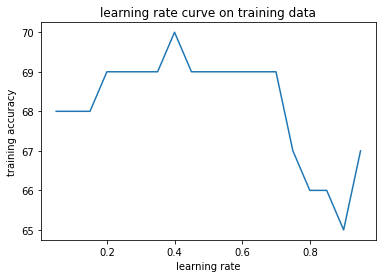

In [ ]:
# Plot the graphs for accuracy results.
# There will be 2 graphs - one for training data and the other for testing data
# For each graph,
    # X-axis will be the learning rate going from 0.05-1 in increments on 0.05

import matplotlib.pyplot as plt    # Y-axis will be the accuracy values at the selected learning rate.
x = np.arange(start=0.05, stop=1, step=0.05)
y_train = []
y_test = []
for i in x:
  accuracy_train, accuracyt_test = gradient_descent(train_d, test_d, learning_rate=i, threshold=0.5)
  y_train.append(accuracy_train)
  y_test.append(accuracyt_test)

plt.plot(x,y_train)
plt.xlabel("learning rate")  # add X-axis label
plt.ylabel("training accuracy")  # add Y-axis label
plt.title("learning rate curve on training data")  # add title
plt.show()


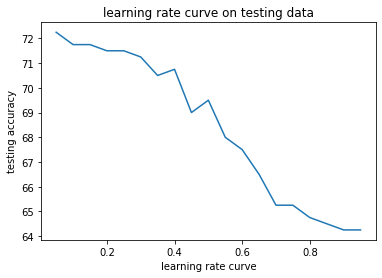

In [ ]:
plt.plot(x,y_test)
plt.xlabel("learning rate curve")  # add X-axis label
plt.ylabel("testing accuracy")  # add Y-axis label
plt.title("learning rate curve on testing data")  # add title
plt.show()

#ID3 Decision Tree

In this section, you will implement the ID3 Decision Tree algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that you are given **all binary-valued attributes** and that there are **no missing values** in the train or test data. 


## Algorithm

(100 points)

Following are the data files that will be provided to you for the ID3 algorithm implementation.

*   Training file - 'id3-train.dat'
*   Testing file - 'id3-test.dat'

In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

In a decision tree, if you reach a leaf node but still have examples that belong to different classes, then choose the most frequent class (among the instances at the leaf node). If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes, then choose the class that is most frequent in the entire training set. You do not need to implement pruning. Also, don’t forget to use logarithm base 2 when computing entropy and set (0 log 0) to 0.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments. The code should output the following 3 things:

*   Print the Decision Tree created, in the following example format:

    ```
    attr1 = 0 :
        attr2 = 0 :
            attr3 = 0 : 1 -- 4
            attr3 = 1 : 0 -- 9
        attr2 = 1 :
            attr4 = 0 : 0 -- 2
            attr4 = 1 : 1 -- 10
    attr1 = 1 :
        attr2 = 1 : 1 -- 17

    ```

*   Accuracy on the Training data = x %
*   Accuracy on the Test data = x %





In [ ]:
# Data file name variables
train = basePath + "id3-train.dat"
test = basePath + "id3-test.dat"
train_d = pd.read_table(train)
test_d = pd.read_table(test)
#print(train_d)

#Reference of this following code of ID3: https://www.python-course.eu/Decision_Trees.php

In [ ]:
"""
Make the imports of python packages needed
"""
import pandas as pd
import numpy as np


dataset= train_d

def entropy(target_col):
    """
    Calculate the entropy of a dataset.
    The only parameter of this function is the target_col parameter which specifies the target column
    """
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy




def InfoGain(data,split_attribute_name,target_name="class"):
    
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    
    ##Calculate the entropy of the dataset
    
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    #Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain
 

In [ ]:
def ID3(data,originaldata,features,target_attribute_name="class",parent_node_class = None):
    
    #Define the stopping criteria --> If one of this is satisfied, we want to return a leaf node#
    
    #If all target_values have the same value, return this value
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    
    #If the dataset is empty, return the mode target feature value in the original dataset
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
    
    #If the feature space is empty, return the mode target feature value of the direct parent node --> Note that
    #the direct parent node is that node which has called the current run of the ID3 algorithm and hence
    #the mode target feature value is stored in the parent_node_class variable.
    
    elif len(features) ==0:
        return parent_node_class
    
    #If none of the above holds true, grow the tree!
    
    else:
        #Set the default value for this node --> The mode target feature value of the current node
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        
        #Select the feature which best splits the dataset
        item_values = [InfoGain(data,feature,target_attribute_name) for feature in features] #Return the information gain values for the features in the dataset
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        
        #Create the tree structure. The root gets the name of the feature (best_feature) with the maximum information
        #gain in the first run
        tree = {best_feature:{}}
        
        
        #Remove the feature with the best inforamtion gain from the feature space
        features = [i for i in features if i != best_feature]
        
        #Grow a branch under the root node for each possible value of the root node feature
        
        for value in np.unique(data[best_feature]):
            value = value
            #Split the dataset along the value of the feature with the largest information gain and therwith create sub_datasets
            sub_data = data.where(data[best_feature] == value).dropna()
            
            #Call the ID3 algorithm for each of those sub_datasets with the new parameters --> Here the recursion comes in!
            subtree = ID3(sub_data,dataset,features,target_attribute_name,parent_node_class)
            
            #Add the sub tree, grown from the sub_dataset to the tree under the root node
            tree[best_feature][value] = subtree
            
        return(tree)    

    
def predict(query,tree,default = 1):

        
    #1.
    for key in list(query.keys()):
        if key in list(tree.keys()):
            #2.
            try:
                result = tree[key][query[key]] 
            except:
                return default
  
            #3.
            result = tree[key][query[key]]
            #4.
            if isinstance(result,dict):
                return predict(query,result)

            else:
                return result

      

def test(data,tree):
    #Create new query instances by simply removing the target feature column from the original dataset and 
    #convert it to a dictionary
    queries = data.iloc[:,:-1].to_dict(orient = "records")
    
    #Create a empty DataFrame in whose columns the prediction of the tree are stored
    predicted = pd.DataFrame(columns=["predicted"]) 
    
    #Calculate the prediction accuracy
    for i in range(len(data)):
        predicted.loc[i,"predicted"] = predict(queries[i],tree,1.0) 
    #print('The prediction accuracy is: ',(np.sum(predicted["predicted"] == data["class"])/len(data)))
    result = (np.sum(predicted["predicted"] == data["class"])/len(data))
    return result
    

def Print_Tree(tree,s):
 if not isinstance(t,dict) and not isinstance(tree,list):
      print("\t"*s+str(tree))
 else:
     for key in tree:
        if isinstance(key,str):
            print("\t"*s+str(key)+"=")
     
        elif not isinstance(key,str):
            print("\t"*s+str(key))
           
        if not isinstance(tree,list):
            formatData(tree[key],s+1)
            
 

tree_train = ID3(train_d,train_d,train_d.columns[:-1])
tree_test= ID3(test_d,test_d,test_d.columns[:-1])

formatData(tree_train,0)

print("The training accuracy is" , test(train_d,tree_train))
print("The testing accuracy is" , test(test_d,tree_test))


attr5=
	0
		attr6=
			0.0
				attr2=
					0.0
						attr1=
							0.0
								attr4=
									0.0
										attr3=
											0.0
												0.0
											1.0
												0.0
									1.0
										attr3=
											0.0
												0.0
											1.0
												0.0
							1.0
								attr4=
									0.0
										attr3=
											0.0
												0.0
											1.0
												0.0
									1.0
										0.0
					1.0
						attr4=
							0.0
								attr3=
									0.0
										0.0
									1.0
										attr1=
											0.0
												0.0
											1.0
												0.0
							1.0
								attr1=
									0.0
										attr3=
											0.0
												0.0
											1.0
												0.0
									1.0
										attr3=
											0.0
												0.0
											1.0
												0.0
			1.0
				attr4=
					0.0
						attr2=
							0.0
								attr3=
									0.0
										attr1=
											0.0
												0.0
											1.0
												0.0
									1.0
										attr1=
											0.0
						

##Extra Credit - Learning Curve

(05 points)

Instead of taking the entire training data (all 800 instances), loop through to select 'x' instances in the increments of 40 (i.e. 40, 80, 120, and so on). For each selected number 'x', randomly pick the example instances from the training data and call the ID3 function to create the decision tree. Calculate the accuracy of the created ID3 tree on the Test data file. Plot the corresponding graph, aka Learning Curve.


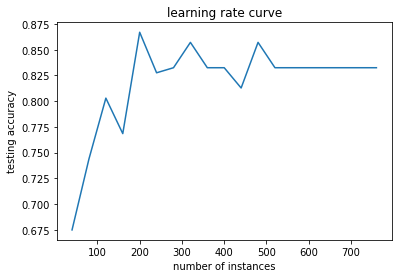

In [ ]:
# Loop through to select the number of instances 'x' in increments of 40
# For each 'x',
    # Randomly select 'x' instances
    # Create the ID3 decision tree using those instances
    # Calculate the accuracy of the ID3 tree created on the Test data

# Plot the learning curve using the accuracy values
    # X-axis will be the number of training instances used for creating the tree
    # Y-axis will be the accuracy in % on the Test data

x = np.arange(start=40, stop=len(train_d), step=40)
y_train = []
for i in range(len(x)):
  temp = train_d.sample(n = x[i])
  tree = ID3(temp,temp,temp.columns[:-1])
  y_train.append(test(test_d,tree))

##Plotting  
plt.plot(x,y_train)
plt.xlabel("number of instances")  # add X-axis label
plt.ylabel("testing accuracy")  # add Y-axis label
plt.title("learning rate curve")  # add title
plt.show()

#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (50 points) Gradient Descent Algorithm
*   (05 points) Extra Credit - GD Accuracy Plots
*   (100 points) ID3 Algorithm
*   (05 points) Extra Credit - ID3 Learning Curve
